In [1]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2]:
#Ver con glob para carpeta local
df0= pd.read_csv('DEN_2015.csv', sep=';')
df1= pd.read_csv('DEN_2016.csv', sep=';')
df2= pd.read_csv('DEN_2017.csv', sep=';')
df3= pd.read_csv('DEN_2018.csv', sep=';')
df4= pd.read_csv('DEN_2019.csv', sep=';')
df5= pd.read_csv('DEN_2020.csv', sep=';')
DF_TOTAL=[df0, df1, df2, df3, df4, df5]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
for df in DF_TOTAL:
    #Cantidad de Departamentos, Distritos y Provincias
    df["Dep-Prov-Distrito"] = df["Departamento"] + ", " + df["Provincia"] + ", " + df["Distrito"]
    df["Dep-Prov"] = df["Departamento"] + ", " + df["Provincia"]
    print("La cantidad de departamentos es:", df['Departamento'].nunique())
    print("La cantidad de distritos es:", df['Dep-Prov-Distrito'].nunique())
    print("La cantidad de provincias es:", df['Dep-Prov'].nunique())
    print('----------------')

La cantidad de departamentos es: 18
La cantidad de distritos es: 230
La cantidad de provincias es: 65
----------------
La cantidad de departamentos es: 18
La cantidad de distritos es: 249
La cantidad de provincias es: 66
----------------
La cantidad de departamentos es: 19
La cantidad de distritos es: 329
La cantidad de provincias es: 74
----------------
La cantidad de departamentos es: 19
La cantidad de distritos es: 179
La cantidad de provincias es: 62
----------------
La cantidad de departamentos es: 19
La cantidad de distritos es: 246
La cantidad de provincias es: 72
----------------
La cantidad de departamentos es: 20
La cantidad de distritos es: 376
La cantidad de provincias es: 89
----------------


In [4]:
DF_TOTAL_T = pd.concat(DF_TOTAL, axis=0, ignore_index=True)

In [5]:
for c in DF_TOTAL_T.columns:
    print(c)

Departamento
Distrito
Provincia
numero_casos
ocntrol1
Texto_casos
Texto_casos_confirmados
Texto_muertes
texto_Titulo
Año
Eventos o daños
Ubigeo
Actualizado
Actualizado hasta la SE
ambito
anoubigeo
Año seleccionado
CAP_DIST
CD_DEPA
CD_DIST
CD_PROV
cod_disa
COD_REG
condpobrez
Decil de incidencia acumulada
departam
disa
disa15
distrito
Eventos (grupo)
Eventos o daños filtro
fe_proc
FEC_ING
Filtro Mapa 
frontera
FUENTE
GLOBALID
Id
Incidencia acumulada.
Incidencia semanal
mm
numero_casos _confirmados
numero_muertes
Peru
priorizado
provincia
qpobreza
Reg Nat
reg_geogra
reg_natu
Semana
ubiprov
ADOLECENTE
ADULTO
ADULTO_MAY
Calculo2
Calculo3
Casos
Casos acumulados
Casos confirmados acumulados
Casos Dis/Depto
cuartilTDIS
Defunciones
Defunciones acumuladas
DIS_C
DIS_P
DIS_P_ACUM
e0
e1_4
e5_mas
factorPoblacion
friaje
Geometría
gestantes
indigena
JOVEN
Latalidad (%)
mancomunidad
Max año disponible
maxyear
mef
men_15
men_29d
men_5
MORTAL_C
MORTAL_P
nacidos
NINOS
OBJECTID
POB2
pobtot
propo_posit
Refe

In [6]:
DF_TOTAL_T = DF_TOTAL_T[['Dep-Prov-Distrito', 'Distrito', 'Semana', 'Incidencia semanal','Casos', 'Año']] 
DF_TOTAL_T['Incidencia semanal']= df['Incidencia semanal'].str.replace(',', '.').astype(float)
DF_TOTAL_T['Semana'] = DF_TOTAL_T['Semana'] + DF_TOTAL_T['Año'].apply(lambda x: (x-2015)*53 if x>2015 else 0)
DF_TOTAL_T

,Dep-Prov-Distrito,Distrito,Semana,Incidencia semanal,Casos,Año
0,"LAMBAYEQUE, LAMBAYEQUE, LAMBAYEQUE",LAMBAYEQUE,24,1.24886,1.0,2015
1,"LAMBAYEQUE, LAMBAYEQUE, LAMBAYEQUE",LAMBAYEQUE,27,1.24886,1.0,2015
2,"LAMBAYEQUE, LAMBAYEQUE, LAMBAYEQUE",LAMBAYEQUE,21,1.24886,1.0,2015
3,"LAMBAYEQUE, LAMBAYEQUE, LAMBAYEQUE",LAMBAYEQUE,53,0.00000,0.0,2015
4,"LAMBAYEQUE, LAMBAYEQUE, LAMBAYEQUE",LAMBAYEQUE,52,0.00000,0.0,2015
...,...,...,...,...,...,...
85272,"HUANUCO, LEONCIO PRADO, CASTILLO GRANDE",CASTILLO GRANDE,283,NaN,0.0,2020
85273,"HUANUCO, LEONCIO PRADO, CASTILLO GRANDE",CASTILLO GRANDE,284,NaN,0.0,2020
85274,"HUANUCO, LEONCIO PRADO, CASTILLO GRANDE",CASTILLO GRANDE,285,NaN,0.0,2020
85275,"HUANUCO, LEONCIO PRADO, CASTILLO GRANDE",CASTILLO GRANDE,286,NaN,0.0,2020


In [7]:
DF_TOTAL_T.to_csv('DEN_2015to2020.csv', index = False)

In [8]:
listaDistrito = DF_TOTAL_T['Dep-Prov-Distrito'].tolist()
listaDistrito = list(dict.fromkeys(listaDistrito))
print('Son ', len(listaDistrito), ' distritos')
listaDistrito.sort()
print(listaDistrito)

Son  505  distritos
['AMAZONAS, BAGUA, ARAMANGO', 'AMAZONAS, BAGUA, BAGUA', 'AMAZONAS, BAGUA, COPALLIN', 'AMAZONAS, BAGUA, EL PARCO', 'AMAZONAS, BAGUA, IMAZA', 'AMAZONAS, BAGUA, LA PECA', 'AMAZONAS, BONGARA, FLORIDA', 'AMAZONAS, BONGARA, JAZAN', 'AMAZONAS, CHACHAPOYAS, CHACHAPOYAS', 'AMAZONAS, CONDORCANQUI, EL CENEPA', 'AMAZONAS, CONDORCANQUI, NIEVA', 'AMAZONAS, CONDORCANQUI, RIO SANTIAGO', 'AMAZONAS, UTCUBAMBA, BAGUA GRANDE', 'AMAZONAS, UTCUBAMBA, CAJARURO', 'AMAZONAS, UTCUBAMBA, CUMBA', 'AMAZONAS, UTCUBAMBA, EL MILAGRO', 'AMAZONAS, UTCUBAMBA, JAMALCA', 'AMAZONAS, UTCUBAMBA, YAMON', 'ANCASH, CASMA, BUENA VISTA ALTA', 'ANCASH, CASMA, CASMA', 'ANCASH, CASMA, COMANDANTE NOEL', 'ANCASH, HUARMEY, HUARMEY', 'ANCASH, SANTA, CHIMBOTE', 'ANCASH, SANTA, COISHCO', 'ANCASH, SANTA, NEPEÑA', 'ANCASH, SANTA, NUEVO CHIMBOTE', 'ANCASH, SANTA, SANTA', 'AREQUIPA, CARAVELI, BELLA UNION', 'AYACUCHO, CANGALLO, CANGALLO', 'AYACUCHO, HUAMANGA, AYACUCHO', 'AYACUCHO, HUAMANGA, JESUS NAZARENO', 'AYACUCHO, HUAMA

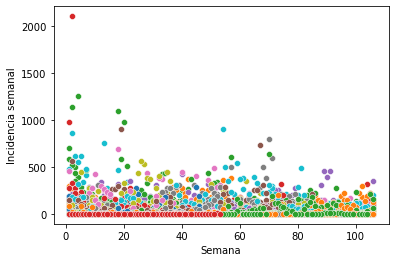

In [9]:
timeSeries = pd.DataFrame()

for dis in listaDistrito:
    distrito=DF_TOTAL_T[DF_TOTAL_T['Dep-Prov-Distrito']==dis]
    distrito.sort_values(['Semana'], ascending = True)    
    distrito = distrito.reset_index(drop=True)
    timeSeries = timeSeries.append(distrito['Incidencia semanal'])
    #timeSeriesNorm = timeSeriesNorm.append(pd.Series(normalizado.flatten()), ignore_index=True)
    #print(dis)
    ax = sns.scatterplot(y=distrito['Incidencia semanal'], x= distrito['Semana'])
plt.show()

In [10]:
#timeSeriesNorm.to_csv('SerieTemporalNorm_2015to2020.csv', index = False)
timeSeries.to_csv('SerieTemporal_2015to2020.csv', index = False)

In [12]:
timeSeries

,0,1,2,3,4,5,6,7,8,9,...,308,309,310,311,312,313,314,315,316,317
Incidencia semanal,0.0000,0.0000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incidencia semanal,32.6122,65.2245,54.3537,65.22450,21.7415,10.87070,21.74150,10.87070,10.8707,10.8707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incidencia semanal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incidencia semanal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incidencia semanal,0.0000,0.0000,0.0000,4.20468,0.0000,0.00000,0.00000,0.00000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Incidencia semanal,0.0000,0.0000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incidencia semanal,88.5112,70.8090,88.5112,35.40450,17.7022,17.70220,17.70220,17.70220,17.7022,17.7022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incidencia semanal,56.0185,28.0092,28.0092,28.00920,14.0046,7.00231,7.00231,7.00231,14.0046,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incidencia semanal,15.0921,0.0000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
len(timeSeries.iloc[1,:].values)

318

318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318
318


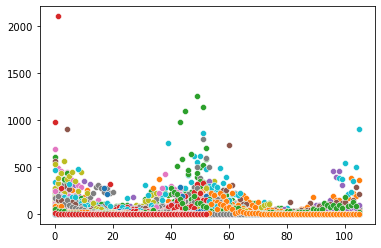

In [16]:
for i in list(range(timeSeries.shape[0])):
    print(len(timeSeries.iloc[i,:].values))
    ax = sns.scatterplot(y=timeSeries.iloc[i,:].values, x=list(range(len(timeSeries.iloc[i,:].values))))
plt.show()

In [ ]:
plt.show(timeSeries[])